# Data Mining CMP-7023B
## Lab 6: Supervised Learning - Classification Part 2 - practice sample solutions

## Heart Disease UCI
In this practice sheet we are using Heart Disease dataset from UCI (Machine Learning Repository)

### Content

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them https://archive.ics.uci.edu/ml/datasets/heart+disease

Attribute Information:
- age : age in years
- sex: sex (1 = male; 0 = female)
- cp : chest pain type (4 values)
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl 
- fbs: fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)
- restecg: resting electrocardiographic results (values 0,1,2)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality
    - Value 2: showing left ventricular hypertrophy
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target (num): diagnosis of heart disease (angiographic disease status) (<b> the predicted attribute </b>)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing
    

### Starting out: loading data and libraries
We begin by loading the necessary libraries for the work we are going to do in this lab.

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore') #ignore warnings

#designate the path where you saved your OEC data
heart_data_path = "C:\DM-DATA\heart.csv"

#Load the data using pandas read_csv function. 
orig_data = pd.read_csv(heart_data_path)

#get the data out, leaving behind the target column (last feature).
X = orig_data.iloc[:, :-1]
#extract the target column.
y = orig_data["target"] 

print(X)
print(y)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

## Explore the Data
Look at the distributions or histograms of individual attributes.
Data describtions:

In [2]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


Or use transpose "T"

In [3]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Examine the mean and standard deviation for each attribute.

In [4]:
X.agg({ col:['mean', 'std'] for col in X.columns})

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277


Check for any missing values and outliers

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


Split the dataset into training and testing sets.
* random_state=41: setting a random_state ensures reproducibility. If you use the same random seed, you will get the same results each time you run the code.
* stratify=y: ensures that the proportion of each class in y is maintained in both the training and testing sets. This is particularly important when dealing with imbalanced datasets or when the distribution of classes in the target variable is essential for model training and evaluation.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41, stratify=y)

Build and train a standard pipeline with at least one scaling/transformation stage and a classification stage.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

process = [("transformer", StandardScaler()), ("clf", SVC())]
pipe = Pipeline(process)

pipe.fit(X_train, y=y_train)

Pipeline(steps=[('transformer', StandardScaler()), ('clf', SVC())])

- Evaluate the model's performance using appropriate metrics:
    - Accuracy
    - Precision
    - Recall
    - F1-Score
- Generate the classification report and confusion matrix.

In [8]:
y_pred = pipe.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7802
Precision: 0.7885
Recall: 0.8200
F1 Score: 0.8039


In [10]:
# Generate the classification report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        41
           1       0.79      0.82      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



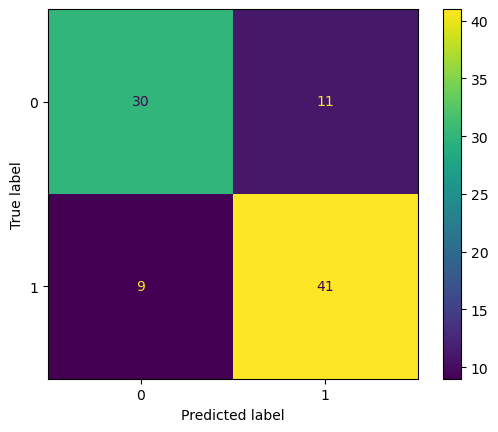

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipe, X_test, y_test)

Plot the precision and recall for the pipeline you have built

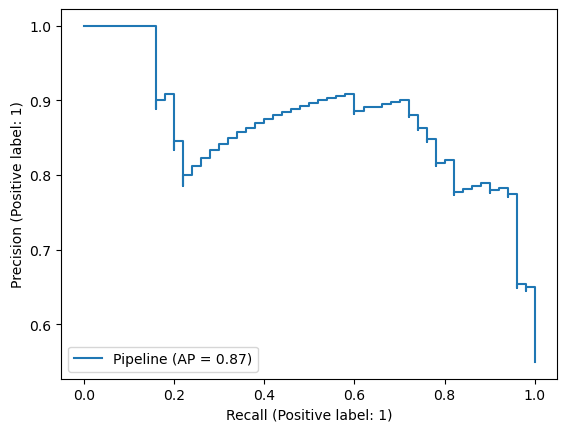

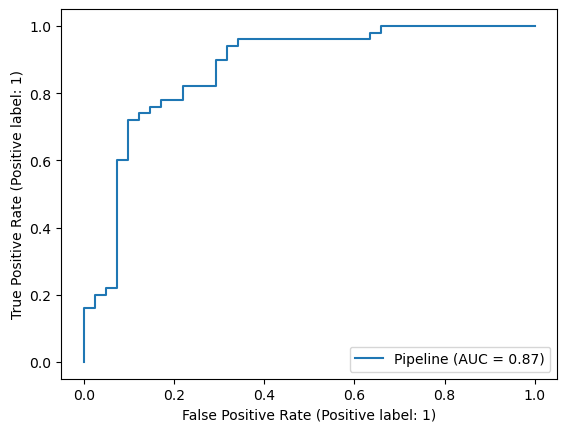

In [12]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

plot_precision_recall_curve(pipe, X_test, y_test)

plot_roc_curve(pipe, X_test, y_test)

Output the accuracy, balanced accuracy and f1 score

In [13]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

y_pred = pipe.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('accuracy', acc)

bacc = balanced_accuracy_score(y_test, y_pred)
print('balanced accuracy', bacc)

f1 = f1_score(y_test, y_pred)
print('f1-score', f1)

accuracy 0.7802197802197802
balanced accuracy 0.7758536585365854
f1-score 0.803921568627451


Build a parameter grid of classifiers and transformers to use for a cross-validated search

This could include passthrough, multiple seqeuences of transformer , a single transformer. 
But must always end up in a classifier.

Consider the classifeirs, `Logistic Regression` `Support Vector Machines` and `Decision Trees`

Consider the possible transformers: `MinMaxScaler`, `Normalizer`, `PowerTransformer`, `QuantileTransformer`, `StandardScaler`


Consider using `ParameterGrid` to generate sets of parameters for your classifiers



In [14]:
#transformers
from sklearn.preprocessing import MinMaxScaler, Normalizer, PowerTransformer, QuantileTransformer, StandardScaler

#classifier imports
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import ParameterGrid

clf_params = [
                (SVC, {"kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed"], "C": [0.01, 0.1, 1.0]}),
                (LogisticRegression, {"penalty" : ["l1", "l2", "elasticnet", "none"], "C": [0.01, 0.1, 1.0]}),
                (DecisionTreeClassifier, {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 
                                          'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]})
             ]
            
clfs = [ctor(**para) for ctor, paras in clf_params for para in ParameterGrid(paras)]

params = dict(transformer= ["passthrough", StandardScaler(), MinMaxScaler(), Normalizer(), PowerTransformer(), QuantileTransformer()],
            clf = clfs)
params

{'transformer': ['passthrough',
  StandardScaler(),
  MinMaxScaler(),
  Normalizer(),
  PowerTransformer(),
  QuantileTransformer()],
 'clf': [SVC(C=0.01, kernel='linear'),
  SVC(C=0.01, kernel='poly'),
  SVC(C=0.01),
  SVC(C=0.01, kernel='sigmoid'),
  SVC(C=0.01, kernel='precomputed'),
  SVC(C=0.1, kernel='linear'),
  SVC(C=0.1, kernel='poly'),
  SVC(C=0.1),
  SVC(C=0.1, kernel='sigmoid'),
  SVC(C=0.1, kernel='precomputed'),
  SVC(kernel='linear'),
  SVC(kernel='poly'),
  SVC(),
  SVC(kernel='sigmoid'),
  SVC(kernel='precomputed'),
  LogisticRegression(C=0.01, penalty='l1'),
  LogisticRegression(C=0.01),
  LogisticRegression(C=0.01, penalty='elasticnet'),
  LogisticRegression(C=0.01, penalty='none'),
  LogisticRegression(C=0.1, penalty='l1'),
  LogisticRegression(C=0.1),
  LogisticRegression(C=0.1, penalty='elasticnet'),
  LogisticRegression(C=0.1, penalty='none'),
  LogisticRegression(penalty='l1'),
  LogisticRegression(),
  LogisticRegression(penalty='elasticnet'),
  LogisticRegress



Through Cross Validation. Find the best pipeline seqeuence to transform the data into a more suitable space (or no transformation),
and perform classification on the target to maximise the Accuracy.


Consider using `GridSearchCV` 



In [15]:
from sklearn.model_selection import GridSearchCV

process = [("transformer", StandardScaler()), ("clf", SVC)]

clf_cv = GridSearchCV(Pipeline(process), params)

clf_cv.fit(X_train, y_train)
score = clf_cv.score(X_test, y_test)
print(score)

print(clf_cv.best_params_)

0.8241758241758241
{'clf': SVC(), 'transformer': QuantileTransformer()}




## Plot the results of the tuned classifier

Firstly show the precision and recall of the GridSearchCV.

Secondly construct the Area under the reciving operator characteristic




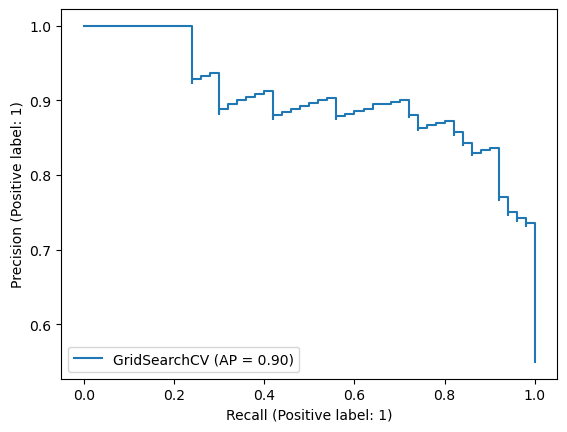

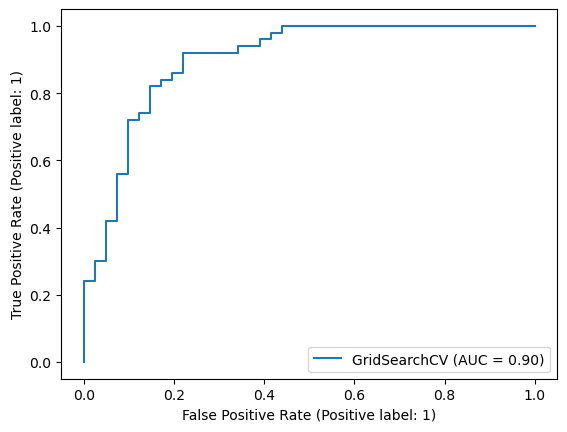

In [16]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

plot_precision_recall_curve(clf_cv, X_test, y_test)

plot_roc_curve(clf_cv, X_test, y_test)

Rather than using a exhaustive grid search of all your parameters.
Which depending on dataset size could take a long time.

We can use different types of hyper parameter optimisation, one such example is `RandomizedSearchCV`

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

Read the documenation and try and implement our pipeline using RandomizedSearchCV instead of GridSearchCV

Plot the ROC and Precision/Recall curves as before. 

Examine the parameters selected. 
What changes?


0.7802197802197802
{'transformer': 'passthrough', 'clf': DecisionTreeClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=10)}


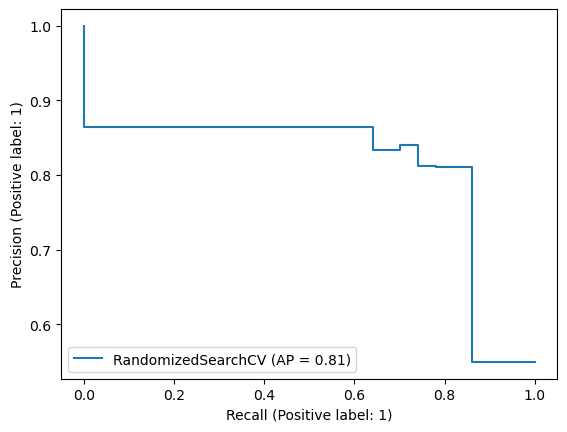

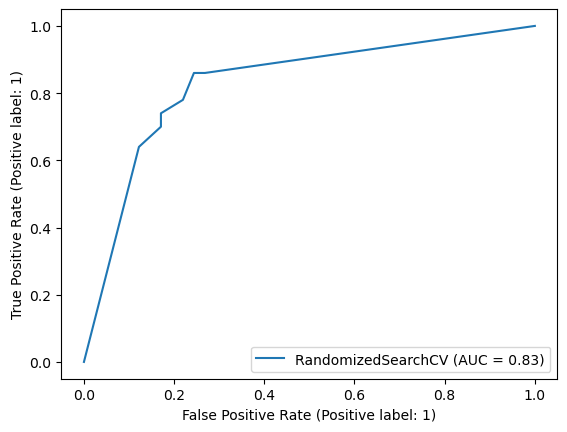

In [17]:

from sklearn.model_selection import RandomizedSearchCV

process = [("transformer", StandardScaler()), ("clf", SVC)]

clf_cv = RandomizedSearchCV(Pipeline(process), params)

clf_cv.fit(X_train, y_train)
score = clf_cv.score(X_test, y_test)
print(score)

print(clf_cv.best_params_)

from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

plot_precision_recall_curve(clf_cv, X_test, y_test)

plot_roc_curve(clf_cv, X_test, y_test)